In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
df=pd.read_csv('aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
#columns with missing value
[col for col in df.columns if df[col].isna().any()]

['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [7]:
df.shape

(19158, 14)

In [9]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [11]:
#missing columns with value
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [13]:
#unique elements in each columns
df.apply(lambda x:len(x.unique()))

enrollee_id               19158
city                        123
city_development_index       93
gender                        4
relevent_experience           2
enrolled_university           4
education_level               6
major_discipline              7
experience                   23
company_size                  9
company_type                  7
last_new_job                  7
training_hours              241
target                        2
dtype: int64

In [15]:
#cheack for duplicates
df.duplicated().sum()

0

In [16]:
#calculating the percentage of the missing value
missing_value = 100 * df.isnull().sum()/len(df)
missing_value

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

In [17]:
missing_value = missing_value.reset_index()
missing_value.columns = ['variables','missing values in percentage']

In [18]:
missing_value

,variables,missing values in percentage
0,enrollee_id,0.000000
1,city,0.000000
2,city_development_index,0.000000
3,gender,23.530640
4,relevent_experience,0.000000
5,enrolled_university,2.014824
6,education_level,2.401086
7,major_discipline,14.683161
8,experience,0.339284
9,company_size,30.994885


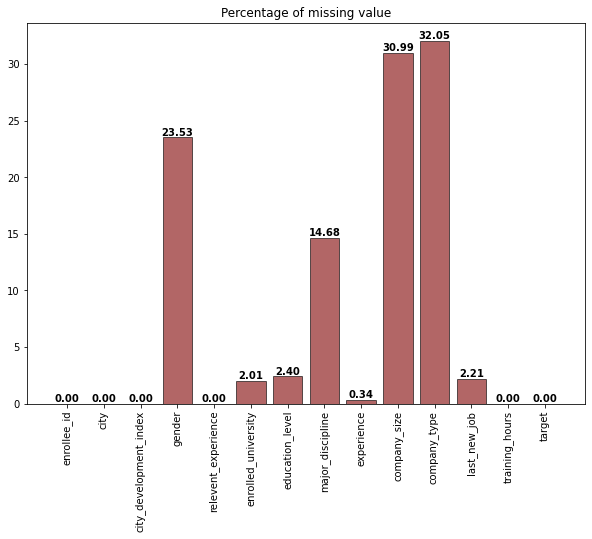

In [26]:
xs=missing_value['variables']
ys=missing_value['missing values in percentage']
plt.figure(figsize = (10,7))
plt.bar(xs,ys,color='maroon',alpha=.6,edgecolor='black')

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 fontweight='bold')
plt.title('Percentage of missing value')
plt.xticks(rotation='vertical');

# Top 10 city where people are leaving most

In [27]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [28]:
df.target

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 19158, dtype: float64

In [65]:
df1=df.groupby(['target','city'])['target'].agg('count')
df1

target  city    
0.0     city_1       23
        city_10      77
        city_100    210
        city_101     32
        city_102    252
                   ... 
1.0     city_93       5
        city_94      10
        city_97       8
        city_98       8
        city_99      15
Name: target, Length: 237, dtype: int64

In [66]:
df1=df1.loc[1].reset_index()


In [73]:
df1.columns=['City','No of employee leaving']
df1=df1.sort_values(by='No of employee leaving',ascending=False).head(10)
df1

,City,No of employee leaving
60,city_21,1597
5,city_103,928
46,city_160,199
45,city_16,179
11,city_11,147
12,city_114,133
95,city_73,74
2,city_100,65
108,city_90,62
28,city_136,61


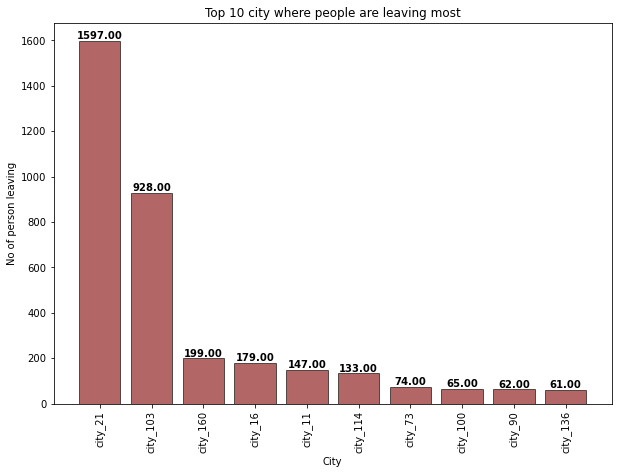

In [76]:
xs=df1['City']
ys=df1['No of employee leaving']
plt.figure(figsize = (10,7))
plt.bar(xs,ys,color='maroon',alpha=.6,edgecolor='black')

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 fontweight='bold')
plt.title('Top 10 city where people are leaving most')
plt.xticks(rotation='vertical')
plt.xlabel('City')
plt.ylabel('No of person leaving');

In [ ]:
so ,from  city city_21 people are leaving most

# People leaving on the basis of the university enrollment

In [79]:
df.enrolled_university.value_counts(dropna=False)

no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64

In [84]:
df.enrolled_university.fillna('no_enrollment',inplace=True)

In [85]:
df.enrolled_university.value_counts(dropna=False)

no_enrollment       14203
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [22]:
df2=df.groupby(['target','enrolled_university'])['target'].agg('count')
df2

target  enrolled_university
0.0     Full time course        2326
        Part time course         896
        no_enrollment          10896
1.0     Full time course        1431
        Part time course         302
        no_enrollment           2921
Name: target, dtype: int64

In [23]:
#choosing index with target equal to 1
#target=0,means people are not leaving
#target=1,means people are  leaving
df2.loc[1]

enrolled_university
Full time course    1431
Part time course     302
no_enrollment       2921
Name: target, dtype: int64

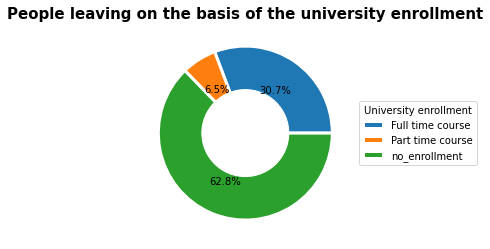

In [24]:

# create data
names =df2.loc[1].index
size =df2.loc[1]
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.5, color='white')

# Give color names
plt.pie(size,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('People leaving on the basis of the university enrollment',fontweight='bold',fontsize=15)
plt.legend(names,
          title="University enrollment",
          loc="center left",
         
          bbox_to_anchor=(1, 0, 0.5, 1));


In [ ]:
So,people who are not enrolled in university are leaving

# People leaving on the basis of the education level

In [102]:
df.education_level.value_counts(dropna=False)

Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [3]:
df2=df.groupby(['target','education_level'])['target'].agg('count')
df2

target  education_level
0.0     Graduate           8353
        High School        1623
        Masters            3426
        Phd                 356
        Primary School      267
1.0     Graduate           3245
        High School         394
        Masters             935
        Phd                  58
        Primary School       41
Name: target, dtype: int64

In [4]:
df2.loc[1]

education_level
Graduate          3245
High School        394
Masters            935
Phd                 58
Primary School      41
Name: target, dtype: int64

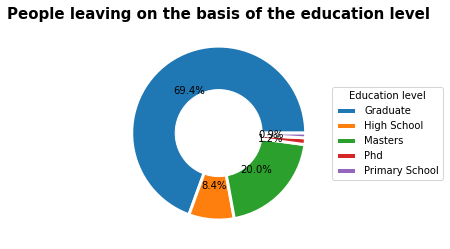

In [5]:
# create data
names =df2.loc[1].index
size =df2.loc[1]
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.5, color='white')

# Give color names
plt.pie(size,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('People leaving on the basis of the education level',fontweight='bold',fontsize=15)
plt.legend(names,
          title="Education level",
          loc="center left",
         
          bbox_to_anchor=(1, 0, 0.5, 1));

In [ ]:
So,graduate people are leaving most

# People leaving on the basis of the major discipline

In [6]:
df['major_discipline']=df['major_discipline'].fillna('Not Mentioned')

In [7]:
df2=df.groupby(['target','major_discipline'])['target'].agg('count')
df2

target  major_discipline
0.0     Arts                  200
        Business Degree       241
        Humanities            528
        No Major              168
        Not Mentioned        2264
        Other                 279
        STEM                10701
1.0     Arts                   53
        Business Degree        86
        Humanities            141
        No Major               55
        Not Mentioned         549
        Other                 102
        STEM                 3791
Name: target, dtype: int64

In [8]:
df2.loc[1]

major_discipline
Arts                 53
Business Degree      86
Humanities          141
No Major             55
Not Mentioned       549
Other               102
STEM               3791
Name: target, dtype: int64

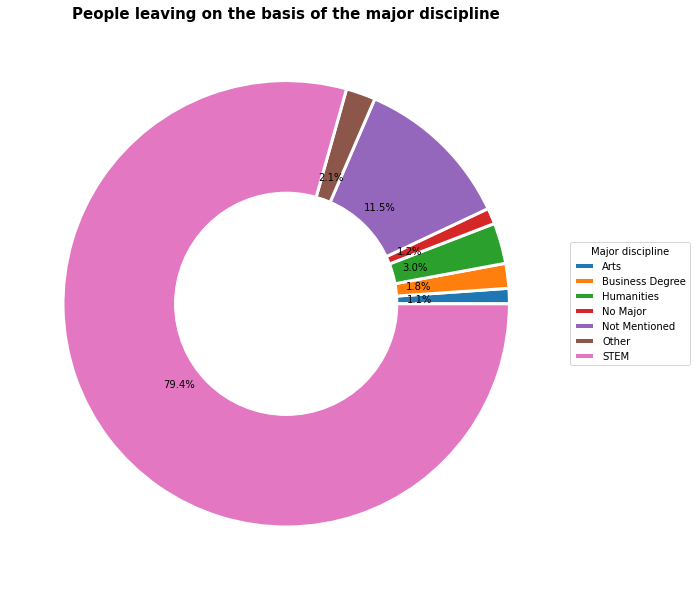

In [9]:
names =df2.loc[1].index
size =df2.loc[1]
plt.figure(figsize=(10,15)) 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.5, color='white')

# Give color names
plt.pie(size,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('People leaving on the basis of the major discipline',fontweight='bold',fontsize=15)
plt.legend(names,
          title="Major discipline",
          loc="center left",
         
          bbox_to_anchor=(1, 0, 0.5, 1));

In [ ]:
So,people are leaving maximum from stem faculty

# People leaving on the basis of the Gender

In [10]:
df.gender=df.gender.fillna('Other')
df2=df.groupby(['target','gender'])['target'].agg('count')
df2

target  gender
0.0     Female      912
        Male      10209
        Other      3260
1.0     Female      326
        Male       3012
        Other      1439
Name: target, dtype: int64

In [11]:
df2.loc[1]

gender
Female     326
Male      3012
Other     1439
Name: target, dtype: int64

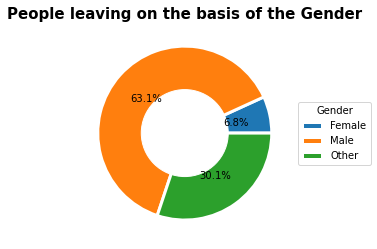

In [12]:
names =df2.loc[1].index
size =df2.loc[1]
#plt.figure(figsize=(10,15)) 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.5, color='white')

# Give color names
plt.pie(size,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('People leaving on the basis of the Gender',fontweight='bold',fontsize=15)
plt.legend(names,
          title="Gender",
          loc="center left",
         
          bbox_to_anchor=(1, 0, 0.5, 1));

In [ ]:
so,male are leaving most.I will prove this point by hypothesis testing

In [13]:
#checking correlation with target
df.corr()['target']

enrollee_id               0.049475
city_development_index   -0.341665
training_hours           -0.021577
target                    1.000000
Name: target, dtype: float64

# Hypothesis testing

H0:there is equal chance of leaving the company by both male and female(independent)
H1:there is not equal chance(dependent)
Since,both columns are categorical so we use Chi-Squared Test

In [147]:
table=pd.crosstab(df.gender,df.target).values
table

array([[  912,   326],
       [10209,  3012],
       [ 3260,  1439]], dtype=int64)

In [149]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=115.275, p=0.000
Probably dependent


So,Gender has influence on target  hence it has to do something with leaving business?

# People leaving on the basis of the prior experience

In [14]:
df['relevent_experience'].value_counts(dropna=False)

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [15]:
df2=df.groupby(['target','relevent_experience'])['target'].agg('count')
df2

target  relevent_experience    
0.0     Has relevent experience    10831
        No relevent experience      3550
1.0     Has relevent experience     2961
        No relevent experience      1816
Name: target, dtype: int64

In [16]:
df2.loc[1]

relevent_experience
Has relevent experience    2961
No relevent experience     1816
Name: target, dtype: int64

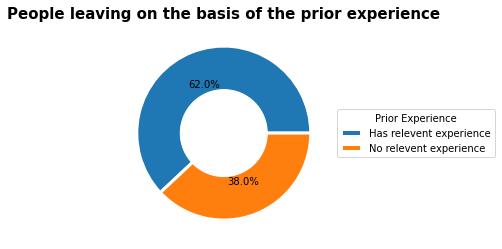

In [17]:
names =df2.loc[1].index
size =df2.loc[1]
#plt.figure(figsize=(10,15)) 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.5, color='white')

# Give color names
plt.pie(size,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('People leaving on the basis of the prior experience',fontweight='bold',fontsize=15)
plt.legend(names,
          title="Prior Experience",
          loc="center left",
         
          bbox_to_anchor=(1, 0, 0.5, 1));

In [ ]:
So, which has experience are leaving most

# People leaving on the basis of the company type

In [18]:
df.company_type.value_counts(dropna=False)
df.company_type=df.company_type.fillna('Other')

In [19]:
df2=df.groupby(['target','company_type'])['target'].agg('count')
df2

target  company_type       
0.0     Early Stage Startup     461
        Funded Startup          861
        NGO                     424
        Other                  3848
        Public Sector           745
        Pvt Ltd                8042
1.0     Early Stage Startup     142
        Funded Startup          140
        NGO                      97
        Other                  2413
        Public Sector           210
        Pvt Ltd                1775
Name: target, dtype: int64

In [20]:
df2.loc[1]

company_type
Early Stage Startup     142
Funded Startup          140
NGO                      97
Other                  2413
Public Sector           210
Pvt Ltd                1775
Name: target, dtype: int64

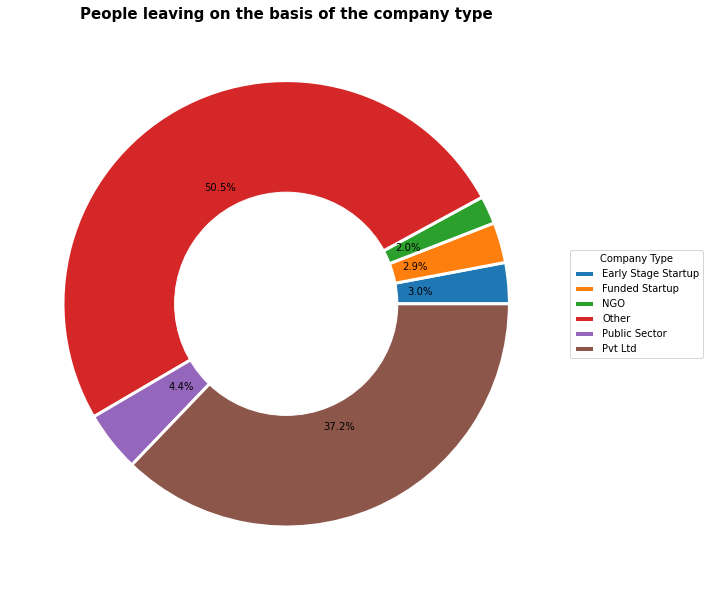

In [21]:
names =df2.loc[1].index
size =df2.loc[1]
plt.figure(figsize=(10,15)) 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.5, color='white')

# Give color names
plt.pie(size,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('People leaving on the basis of the company type',fontweight='bold',fontsize=15)
plt.legend(names,
          title="Company Type",
          loc="center left",
         
          bbox_to_anchor=(1, 0, 0.5, 1));

# People leaving on  the basis of experience

In [187]:
df.experience.value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [202]:
df2=df.groupby(['target','experience'])['target'].agg('count')
df2=df2.loc[1]
df2=df2.reset_index()
df2.columns=['experience level','total_count']
df2=df2.sort_values(by='total_count',ascending=False)
df2

,experience level,total_count
21,>20,503
13,3,478
14,4,457
15,5,412
11,2,374
16,6,343
17,7,303
20,<1,237
0,1,233
19,9,213


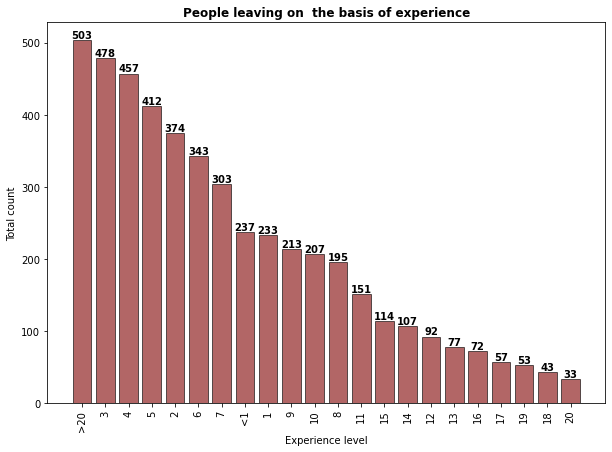

In [205]:
xs=df2['experience level']
ys=df2.total_count
plt.figure(figsize = (10,7))
plt.bar(xs,ys,color='maroon',alpha=.6,edgecolor='black')

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = "{}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 fontweight='bold')
plt.title('People leaving on  the basis of experience',fontweight='bold')
plt.xticks(rotation='vertical')
plt.xlabel('Experience level')
plt.ylabel('Total count');

In [ ]:
So,its strange but most experienced people are leaving